<a href="https://www.kaggle.com/code/aabdollahii/heart-attack-prediction?scriptVersionId=257286424" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# understanding data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/heart-attack-prediction/data.csv")

In [2]:
# Step 3: Quick structure check
print("Shape of dataset:", df.shape)
print("First 20 rows:")
display(df.head(20))


Shape of dataset: (294, 14)
First 20 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
7,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0
8,33,1,3,120,298,0,0,185,0,0.0,?,?,?,0
9,34,0,2,130,161,0,0,190,0,0.0,?,?,?,0


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB
None


In [4]:
print(df.isnull().sum())


age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64


Cleaned column names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


                                             |          | [  0%]   00:00 -> (? left)


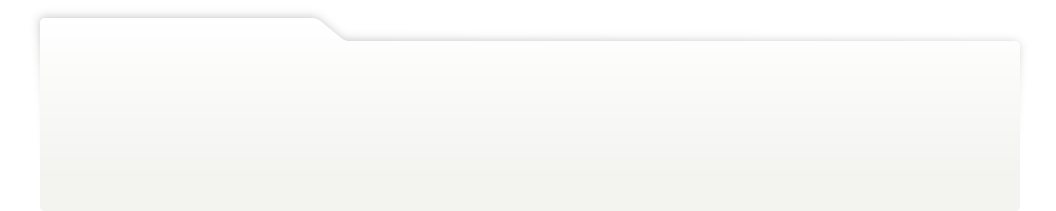
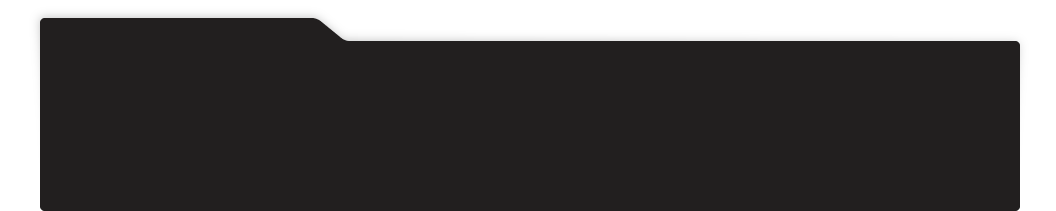
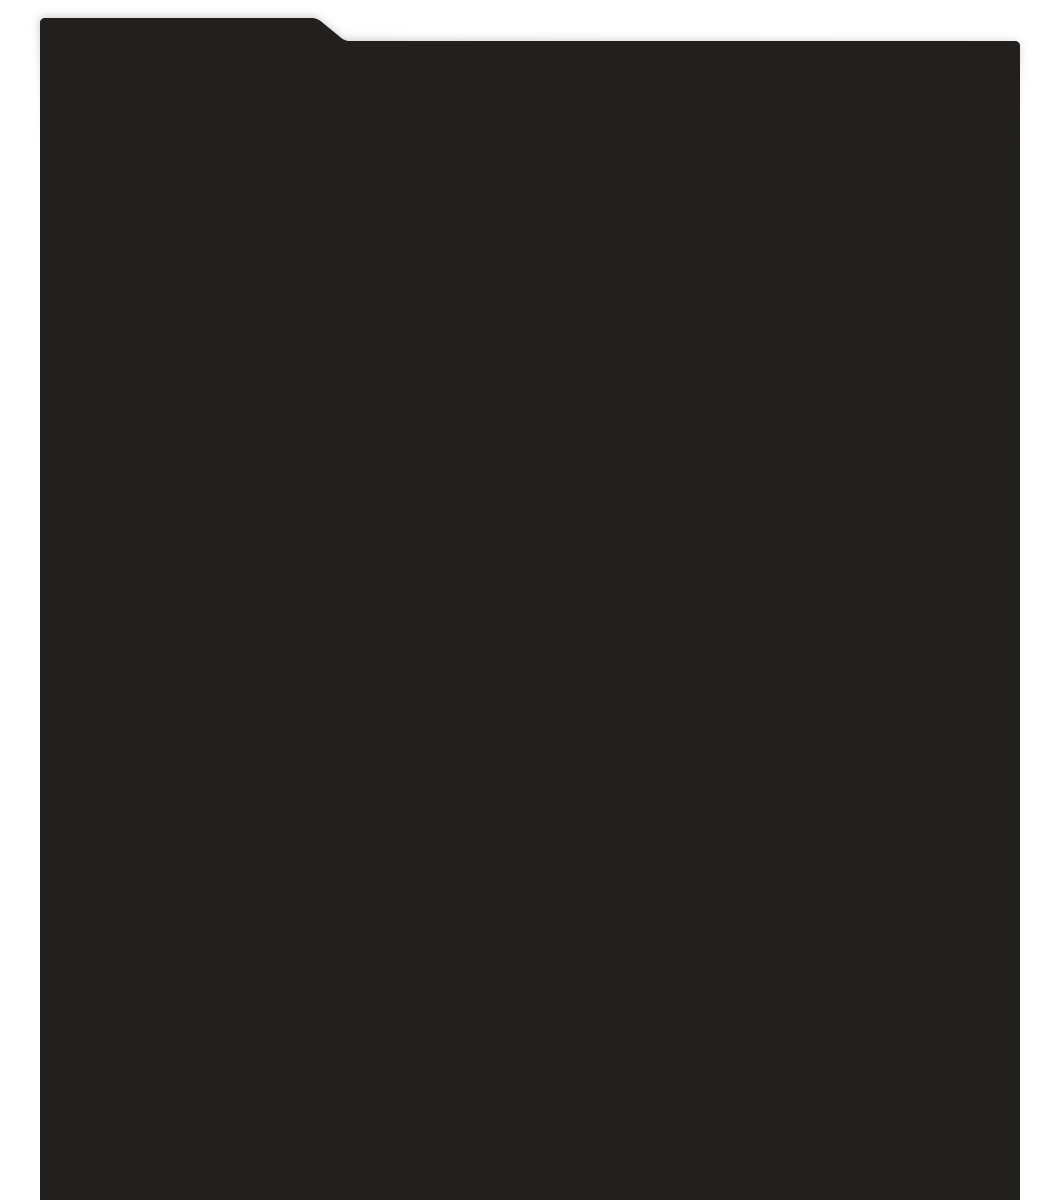
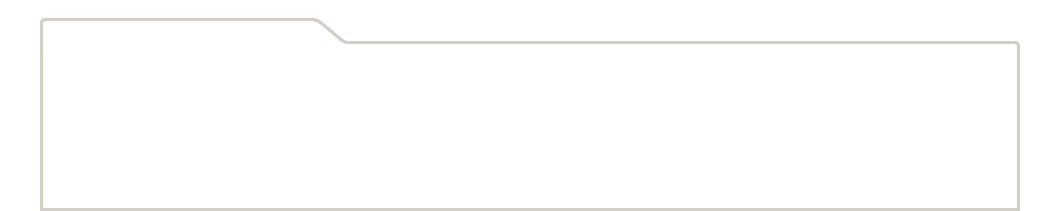
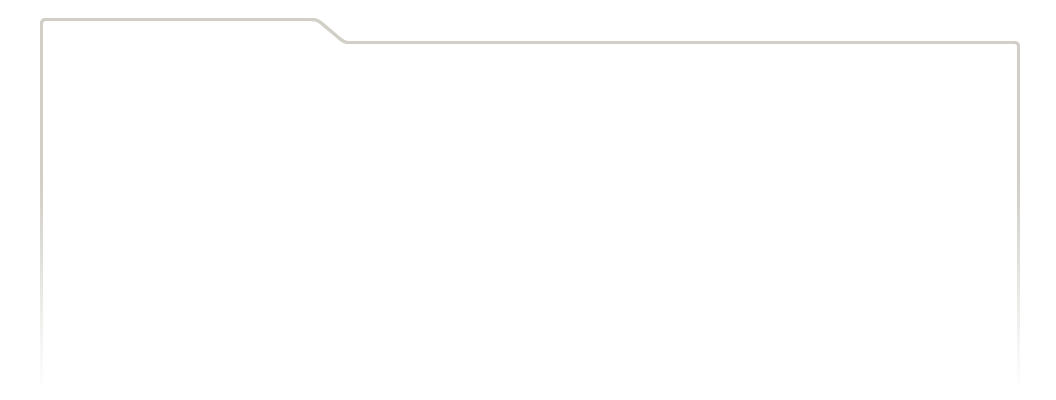
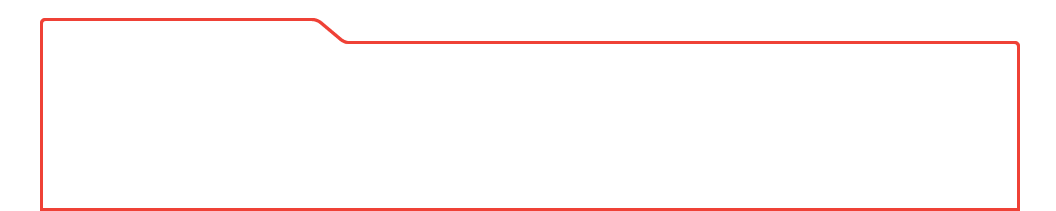
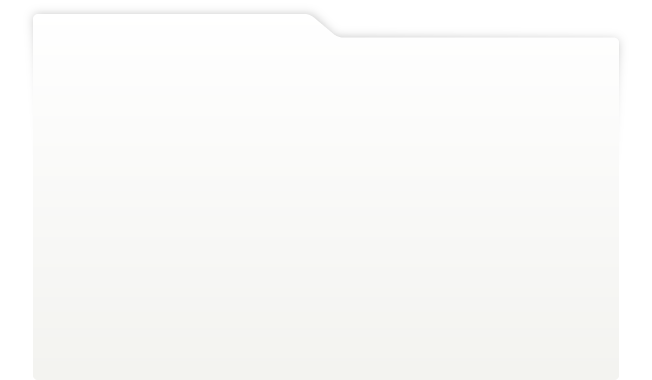
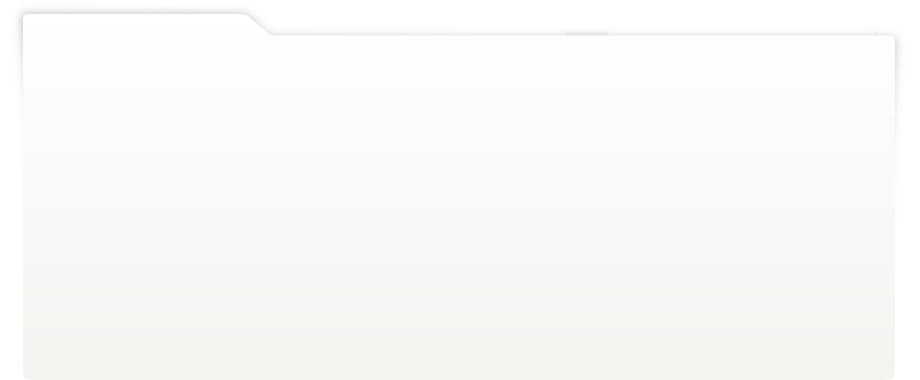
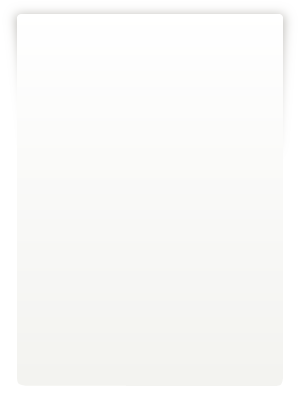
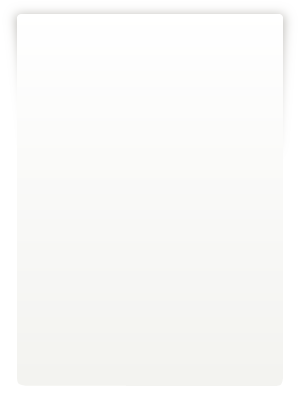
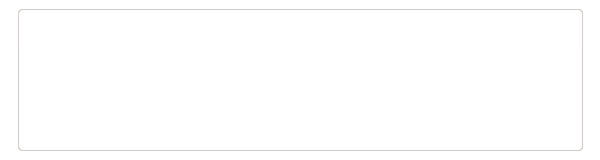
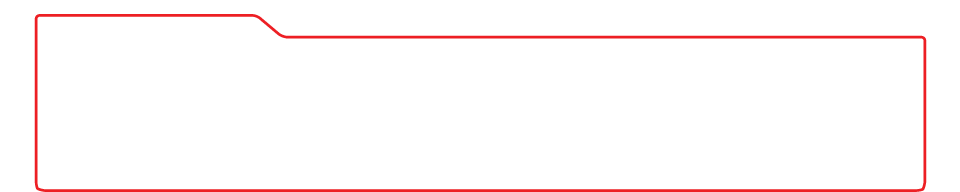
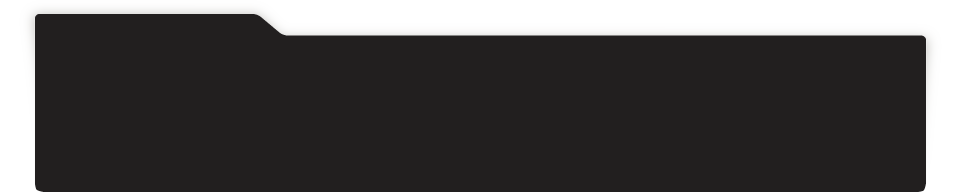
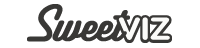
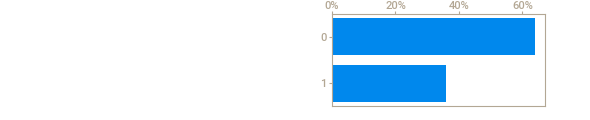
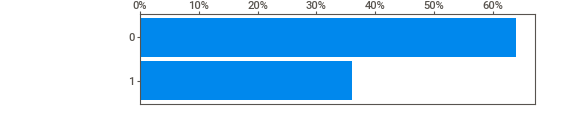
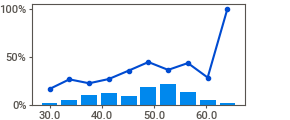
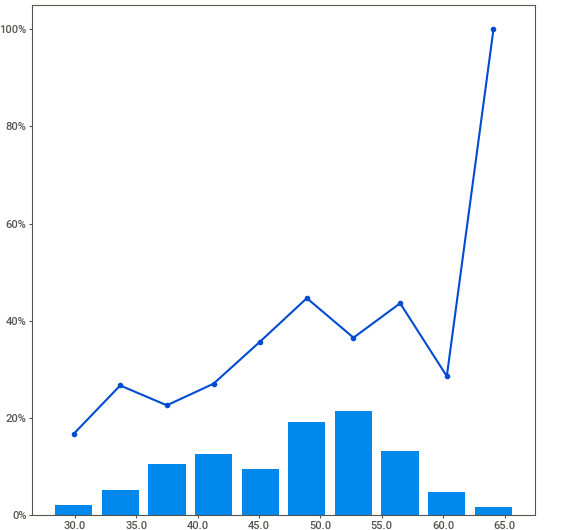
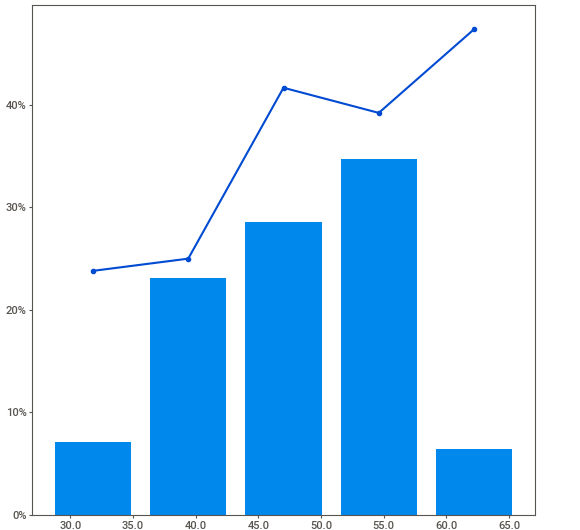
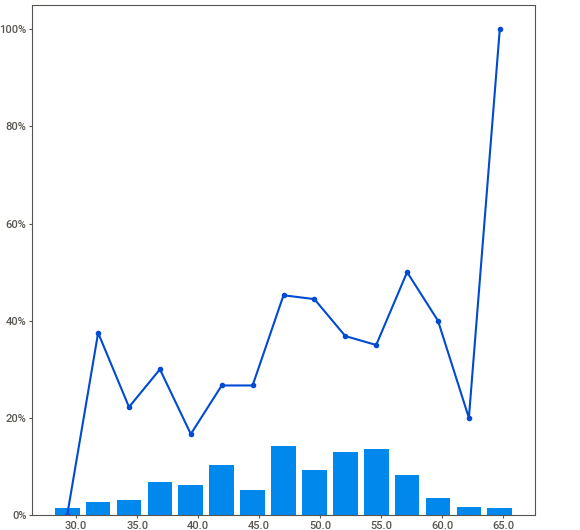
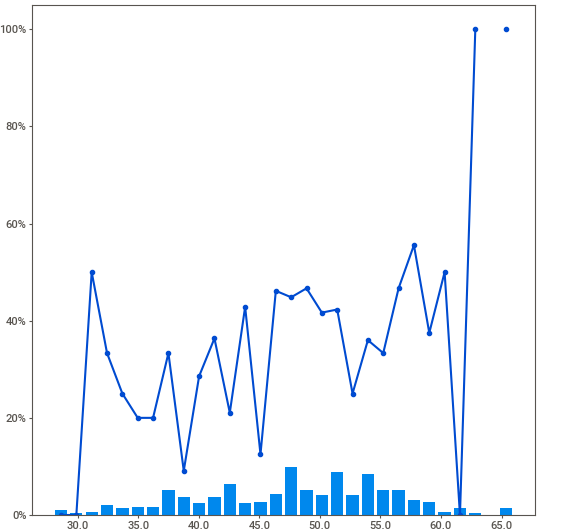
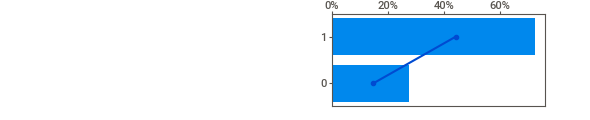
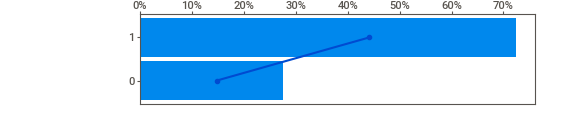
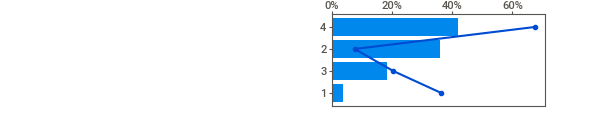
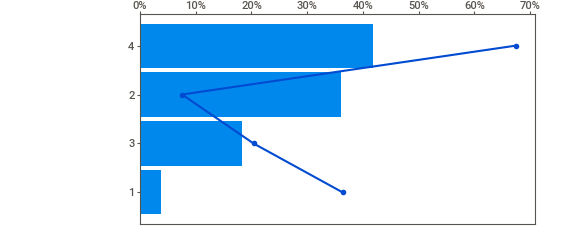
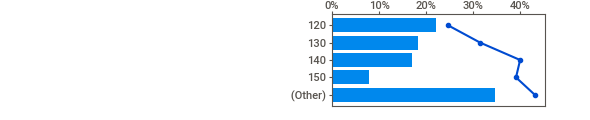
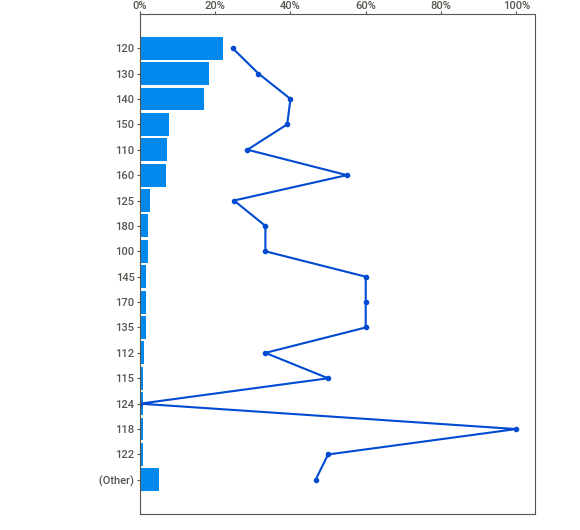
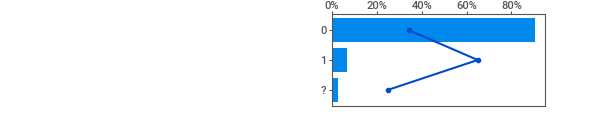
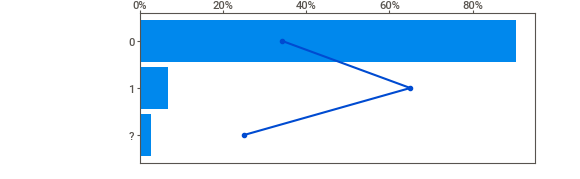
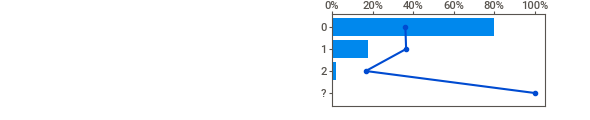
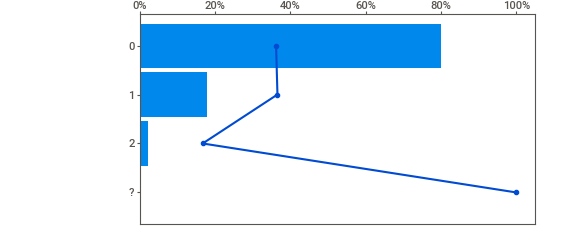
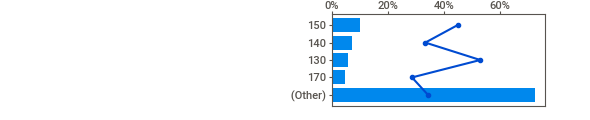
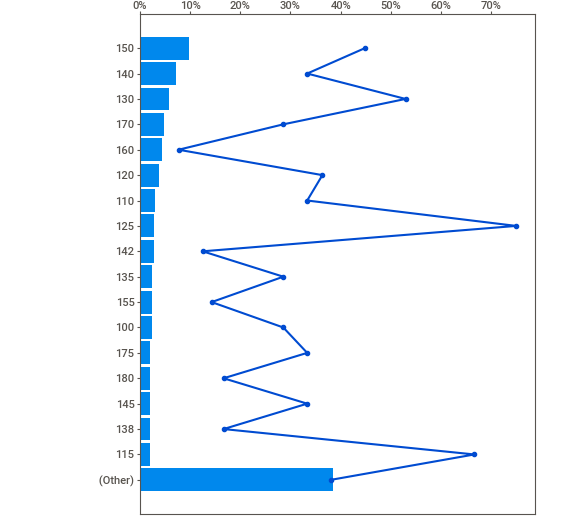
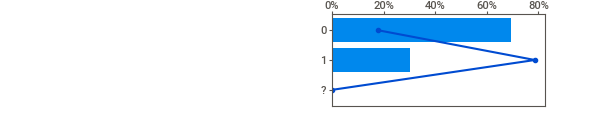
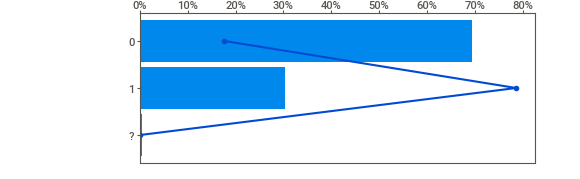
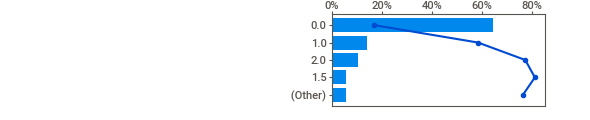
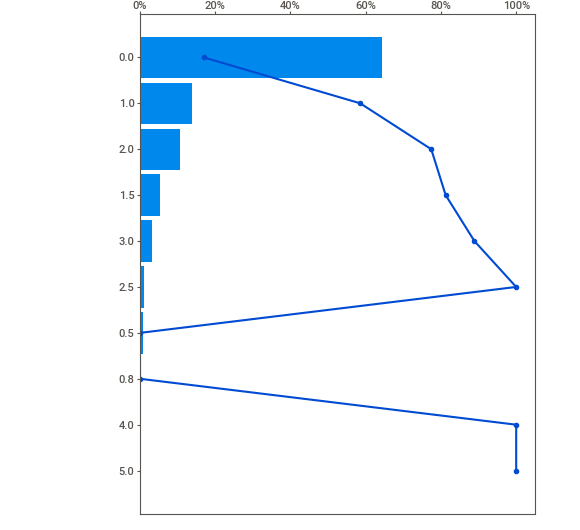
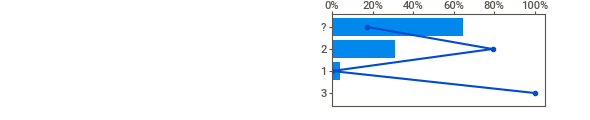
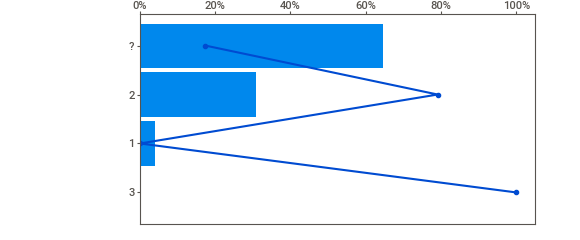
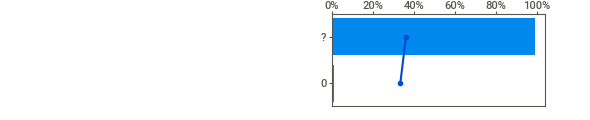
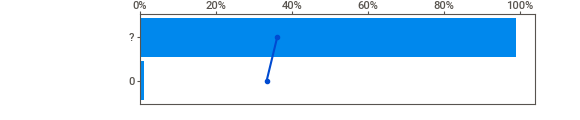
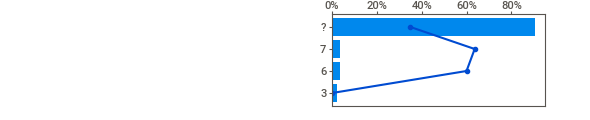
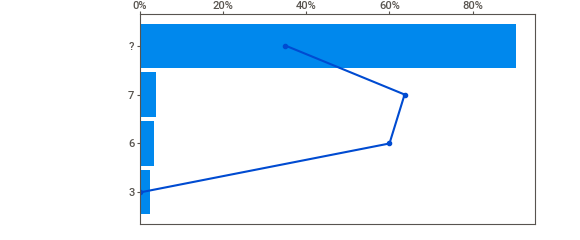
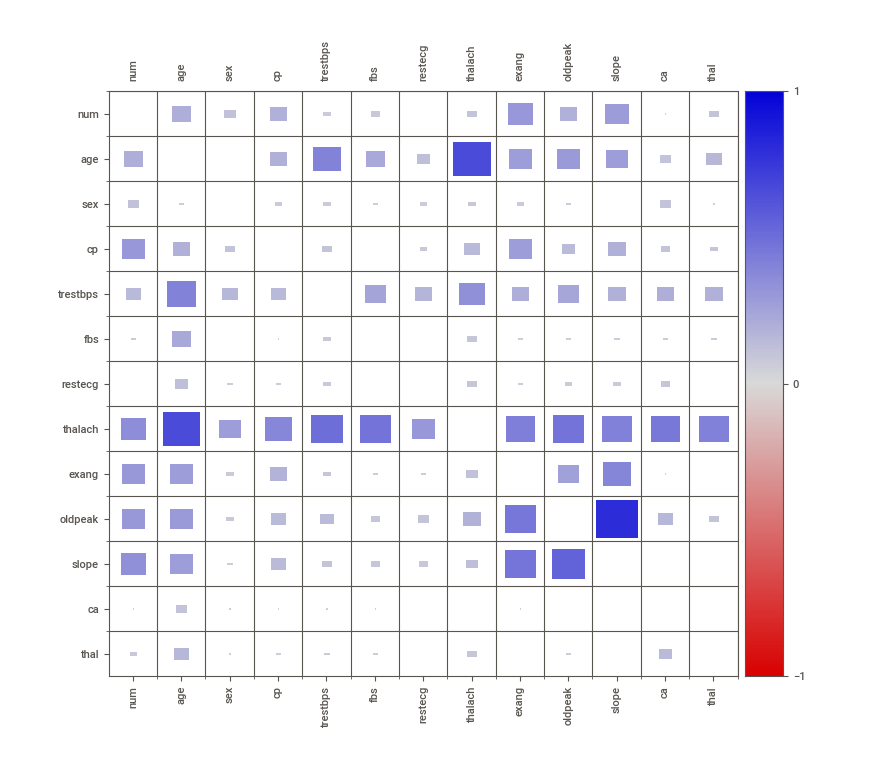
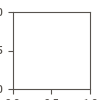

Sweetviz report displayed successfully in notebook!


In [6]:
import pandas as pd
import sweetviz as sv

# Clean the column names by stripping whitespace
df.columns = df.columns.str.strip()

print("Cleaned column names:")
print(df.columns.tolist())

# Generate and display the report in the notebook
report = sv.analyze(df, target_feat='num')
report.show_notebook()  # This displays it directly in the notebook
print("Sweetviz report displayed successfully in notebook!")


# Data Preprocessing & Feature Engineering

In [7]:
# Count missing values in the problematic features
missing_analysis = pd.DataFrame({
    'feature': ['slope', 'thal', 'ca'],
    'total_missing': [
        (df['slope'] == '?').sum(),
        (df['thal'] == '?').sum(),
        (df['ca'] == '?').sum()
    ],
    'missing_percentage': [
        ((df['slope'] == '?').sum() / len(df)) * 100,
        ((df['thal'] == '?').sum() / len(df)) * 100,
        ((df['ca'] == '?').sum() / len(df)) * 100
    ]
})

print("📊 Missing Value Analysis:")
print(missing_analysis)

📊 Missing Value Analysis:
  feature  total_missing  missing_percentage
0   slope            190           64.625850
1    thal            266           90.476190
2      ca            291           98.979592


In [8]:
# Drop the problematic columns
df_clean = df.drop(['slope', 'thal', 'ca'], axis=1)

print(f"Original shape: {df.shape}")
print(f"After dropping: {df_clean.shape}")
print("✅ Dropped slope, thal, and ca columns due to excessive missing data")

Original shape: (294, 14)
After dropping: (294, 11)
✅ Dropped slope, thal, and ca columns due to excessive missing data
